<a href="https://colab.research.google.com/github/takoloco/music_charts/blob/main/Billboard_Chart_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install billboard.py

# Imports

In [110]:
import billboard
import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Settings

In [119]:
pd.set_option('max_rows', 100)

# Hot 100 Analysis

## Pull Data from Billboard

In [154]:
cur_date = datetime.date(2022, 1, 1)
cur_date += datetime.timedelta(days = 6 - cur_date.weekday())  # First Sunday

output = {}
while cur_date < datetime.date.today():
    chart = billboard.ChartData('hot-100', cur_date.strftime('%Y-%m-%d'))
    print('Processing Billboard {} Chart data for the week of {}...'.format(
        chart.name.capitalize(), chart.date))
    output[chart.date] = {}
    output[chart.date]['longest'] = 0
    output[chart.date]['longest_title'] = ''
    output[chart.date]['new'] = 0
    for j in range(len(chart)):
      song = chart[j]
      if song.isNew:
        output[chart.date]['new'] += 1
      if song.weeks > output[chart.date]['longest']:
        output[chart.date]['longest'] = song.weeks
        output[chart.date]['longest_title'] = song.title
    cur_date += datetime.timedelta(days=7) # Skip to next Sunday

Processing Billboard Hot-100 Chart data for the week of 2022-01-08...
Processing Billboard Hot-100 Chart data for the week of 2022-01-15...
Processing Billboard Hot-100 Chart data for the week of 2022-01-22...
Processing Billboard Hot-100 Chart data for the week of 2022-01-29...
Processing Billboard Hot-100 Chart data for the week of 2022-02-05...
Processing Billboard Hot-100 Chart data for the week of 2022-02-12...
Processing Billboard Hot-100 Chart data for the week of 2022-02-19...
Processing Billboard Hot-100 Chart data for the week of 2022-02-26...
Processing Billboard Hot-100 Chart data for the week of 2022-03-05...
Processing Billboard Hot-100 Chart data for the week of 2022-03-12...
Processing Billboard Hot-100 Chart data for the week of 2022-03-19...
Processing Billboard Hot-100 Chart data for the week of 2022-03-26...
Processing Billboard Hot-100 Chart data for the week of 2022-04-02...
Processing Billboard Hot-100 Chart data for the week of 2022-04-09...
Processing Billboard

## Trend Analysis

In [155]:
df_hot_100 = pd.DataFrame(output).T
df_hot_100.reset_index(inplace=True)
df_hot_100.columns = ['Date', 'Longest', 'Longest Title', 'New']
df_hot_100['Date'] = df_hot_100['Date'].astype('datetime64')
 
# Setting the Date as index
df_hot_100 = df_hot_100.set_index('Date')

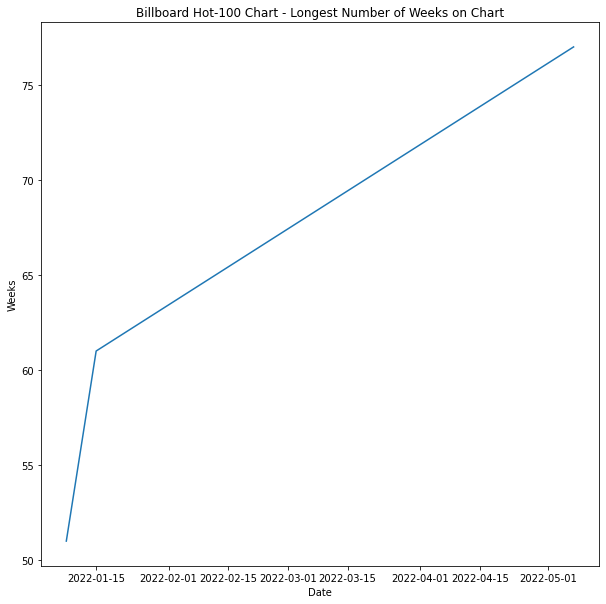

In [156]:
plt.figure(figsize=(10, 10))
plt.plot(df_hot_100['Longest'])
plt.xlabel('Date')
plt.ylabel('Weeks')
plt.title('Billboard {} Chart - Longest Number of Weeks on Chart'.format(
    chart.name.capitalize()))
plt.show()

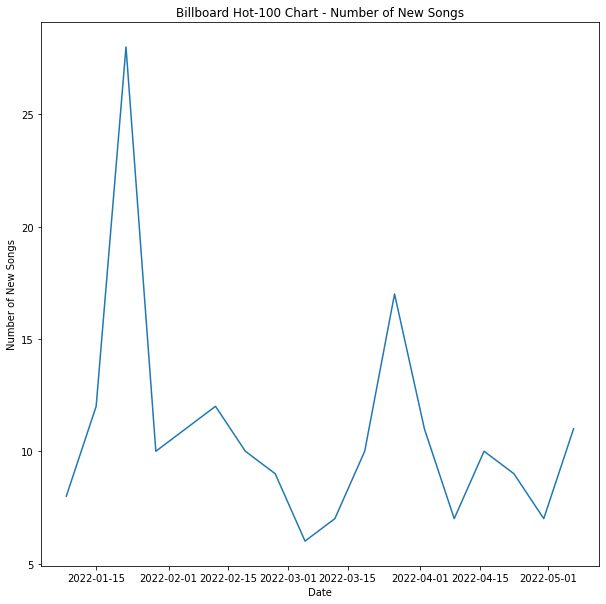

In [157]:
plt.figure(figsize=(10, 10))
plt.plot(df_hot_100['New'])
plt.xlabel('Date')
plt.ylabel('Number of New Songs')
plt.title('Billboard {} Chart - Number of New Songs'.format(chart.name.capitalize()))
plt.show()

## Hot 100 This Week

In [158]:
latest_chart = []

for song in chart:
  song_data = json.loads(song.json())
  latest_chart.append(song_data)

df_latest = pd.DataFrame(latest_chart)
df_latest.set_index(['rank'], inplace=True)
df_latest

,artist,image,isNew,lastPos,peakPos,title,weeks
rank,,,,,,,
1,Harry Styles,None,False,1,1,As It Was,4
2,Jack Harlow,None,False,2,1,First Class,3
3,Glass Animals,None,False,3,1,Heat Waves,67
4,Latto,None,False,4,3,Big Energy,27
5,Imagine Dragons X JID,None,False,5,5,Enemy,23
6,The Kid LAROI & Justin Bieber,None,False,6,1,Stay,42
7,Doja Cat,None,False,8,7,Woman,39
8,Justin Bieber,None,False,10,5,Ghost,31
9,Kodak Black,None,False,9,3,Super Gremlin,25


In [160]:
print('There are {} new songs that made Hot-100 this week.'.format(output[chart.date]['new']))
print('{} is the longest charting song with {} weeks.'.format(output[chart.date]['longest_title'], output[chart.date]['longest']))

There are 11 new songs that made Hot-100 this week.
Levitating is the longest charting song with 77 weeks
